In [1]:
# Import necessary libraries 
import pandas as pd, numpy as np, unicodedata, matplotlib.pyplot as plt, matplotlib.font_manager

In [2]:
# Read CSV
jp = pd.read_csv('csv_cleaned/tiktok_db_jp.csv')
kr = pd.read_csv('csv_cleaned/tiktok_db_kr.csv')
sp = pd.read_csv('csv_cleaned/tiktok_db_sp.csv')

# Drop N/A rows 
jp = jp.dropna()
kr = kr.dropna()
sp = sp.dropna()

# Drop id row
jp = jp.drop(columns=['id'])
kr = kr.drop(columns=['id'])
sp = sp.drop(columns=['id'])

In [3]:
def count_substring(text, substring, normalization='NFC'):
    # Normalize both the text and substring to handle Unicode variations
    normalized_text = unicodedata.normalize(normalization, text)
    normalized_substring = unicodedata.normalize(normalization, substring)
    
    # Count occurrences of the normalized substring
    return normalized_text.count(normalized_substring)

def dem_count(x, dem_use, lang):
    demonstratives = {'jp' : {'proximal' : 'これ', 'medial': 'それ', 'distal': 'あれ'},
                      'kr' : {'proximal' : '이', 'medial': '그', 'distal': '저'},
                      'sp' : {'proximal' : [' esto ', ' esta ', ' estos ', ' estas '], 
                              'medial': [' eso ', ' esos ', ' esa ', ' ese ', ' esas '],
                              'distal': [' aquel ', 'aquella', ' aquellos ', ' aquellas ']}}
    if lang == 'sp': 
        count = 0
        for s in demonstratives[lang][dem_use]:
            count += sum(1 for i in range(len(x) - len(s) + 1) if x[i:i + len(s)] == s)
        return count
    else: 
        count = count_substring(x, demonstratives[lang][dem_use])
        return count

In [4]:
dem_uses = ['proximal', 'medial', 'distal'] 

for q in dem_uses: 
    jp[q] = jp['post'].apply(dem_count, args=(q, 'jp'))
    kr[q] = kr['post'].apply(dem_count, args=(q, 'kr'))
    sp[q] = sp['post'].apply(dem_count, args=(q, 'sp'))

In [5]:
df = pd.concat(objs=[jp, kr, sp])
df

,post,lang,age_group,proximal,medial,distal
0,なんだこれ！！ワクワクするな！！,jp,2,1,0,0
1,すごい！これまでに色んな自動車博物館的なところへ行きましたが、ここのラインナップは凄すぎる😲,jp,2,1,0,0
2,ここの車エンジンも乗ってるの？それとも外見だけのレプリカ的な？,jp,2,0,1,0
3,これは夢やなー,jp,2,1,0,0
4,これは夢やなー,jp,2,1,0,0
...,...,...,...,...,...,...
2149,por eso no tengo más....x si las moscas...JAJAJA,sp,2,0,1,0
2150,Si soy yo me echo a llorar 🤣🤣🤣🤣 eso si menuda ...,sp,2,0,1,0
2151,la pobre biscando buscando esta haciendo un eq...,sp,2,1,0,0
2152,d esos 5 preciosos niños t llegarán las niñas ...,sp,2,0,1,0


In [6]:
from matplotlib import font_manager

font_dirs = ['venv/Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files: 
    font_manager.fontManager.addfont(font_file)

matplotlib.rcParams["font.family"] = 'sans-serif'
matplotlib.rcParams["font.sans-serif"] = "DejaVu Sans"

<Figure size 640x480 with 0 Axes>

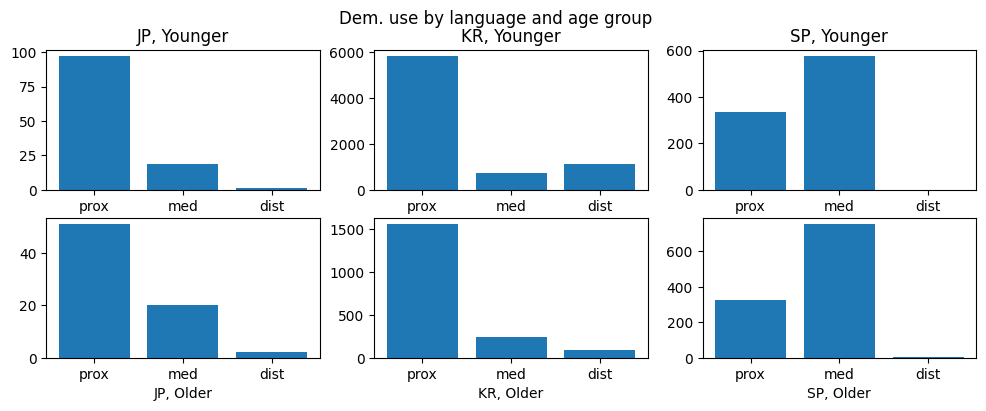

In [7]:
data = {'jp_younger' : {'prox': jp['proximal'].loc[jp['age_group'] == 1].sum(),
                        'med': jp['medial'].loc[jp['age_group'] == 1].sum(),
                        'dist': jp['distal'].loc[jp['age_group'] == 1].sum()},
        'jp_older': {'prox': jp['proximal'].loc[jp['age_group'] == 2].sum(),
                        'med': jp['medial'].loc[jp['age_group'] == 2].sum(),
                        'dist': jp['distal'].loc[jp['age_group'] == 2].sum()},
        'kr_younger': {'prox': kr['proximal'].loc[kr['age_group'] == 1].sum(),
                        'med': kr['medial'].loc[kr['age_group'] == 1].sum(),
                        'dist': kr['distal'].loc[kr['age_group'] == 1].sum()},
        'kr_older': {'prox': kr['proximal'].loc[kr['age_group'] == 2].sum(),
                        'med': kr['medial'].loc[kr['age_group'] == 2].sum(),
                        'dist': kr['distal'].loc[kr['age_group'] == 2].sum()},
        'sp_younger': {'prox': sp['proximal'].loc[sp['age_group'] == 1].sum(),
                        'med': sp['medial'].loc[sp['age_group'] == 1].sum(),
                        'dist': sp['distal'].loc[sp['age_group'] == 1].sum()},
        'sp_older': {'prox': sp['proximal'].loc[sp['age_group'] == 2].sum(),
                        'med': sp['medial'].loc[sp['age_group'] == 2].sum(),
                        'dist': sp['distal'].loc[sp['age_group'] == 2].sum()}}

names_jp_younger = list(data['jp_younger'].keys())
names_jp_older = list(data['jp_older'].keys())
names_kr_younger = list(data['kr_younger'].keys())
names_kr_older = list(data['kr_older'].keys())
names_sp_younger = list(data['sp_younger'].keys())
names_sp_older = list(data['sp_older'].keys())

values_jp_younger = list(data['jp_younger'].values())
values_jp_older = list(data['jp_older'].values())
values_kr_younger = list(data['kr_younger'].values())
values_kr_older = list(data['kr_older'].values())
values_sp_younger = list(data['sp_younger'].values())
values_sp_older = list(data['sp_older'].values())

plt.figure()
fig1, axs = plt.subplots(2, 3, figsize=(12, 4))
axs[0, 0].bar(names_jp_younger, values_jp_younger)
axs[0, 0].set_title("JP, Younger")

axs[1, 0].bar(names_jp_older, values_jp_older)
axs[1, 0].set_xlabel("JP, Older")

axs[0, 1].bar(names_kr_younger, values_kr_younger)
axs[0, 1].set_title("KR, Younger")
axs[1, 1].bar(names_kr_older, values_kr_older)
axs[1, 1].set_xlabel("KR, Older")

axs[0, 2].bar(names_sp_younger, values_sp_younger)
axs[0, 2].set_title("SP, Younger")
axs[1, 2].bar(names_sp_older, values_sp_older)
axs[1, 2].set_xlabel("SP, Older")

fig1.suptitle("Dem. use by language and age group")
plt.savefig("Dem_usage_lang_agegroup_tiktok.pdf")
plt.show()


In [8]:
df.to_csv("tiktok_out.csv")

# Data Summary 
Data was collected from the comment sections of Tiktok videos, with 6 videos per age category, per language (36 videos total). I modified a python script to create and append to a SQL database, tagging each video for the language and age bracket to be targeted. 

## Data Selection 
### Language 
I used a VPN to tunnel into servers in countries where the target languages were widely spoken. This caused the Tiktok recommendation algorithm to exclusively serve content in the target language, leaving only the age bracket to select for. 

### Age Bracket 
This aspect was more difficult to select for, as information on user age is rightly not accessible by the public. To account for this, I selected topics which either skewed towards younger or older audiences. Videos involving current trends (e.g. makeup, fashion, video games, dances) were selected for the younger bracket, where videos with a broader appeal (e.g. news, animals) were selected for the older bracket.  

## Preliminary results
In Japanese and Korean, the proximal is used the most across age brackets. In Korean, however, this may be complicated by the rudimentary selection of demonstratives (see bsky.ipynb for more information). Interestingly, the distal appears to be used more in Korean by younger commenters than by older commenters.

In Spanish, the medial demonstrative appears to be favored both by younger and older commenters, where the distal is barely used at all. Because social media comments may be more likely to make use of anaphora (i.e. "This video is my favorite!"), this may point towards a highly exophoric use of the distal in Spanish, where the proximal and distal may take on a more exophoric use. However, from the literature on Spanish’s distal demonstrative, it is more likely that aquel/aquella is declining in all uses.